In [4]:
import cv2
import numpy as np
import os
import sys
sys.path.append('../../src')
import DISData as DD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
doUT = DD.SQL()

host:  192.168.0.128
user:  diadmin
password:  ········


SQL connection done


In [14]:
data_name = 'DataVoucher2022'

In [15]:
query = f'''select label, count(img_dir) as count from DeepInSight.{data_name}_box_info group by label;'''

In [8]:
db = doUT.db
conn = doUT.conn
conn.execute(query)
column_names = [desc[0] for desc in conn.description]
result = conn.fetchall()
db.commit()

In [9]:
df = pd.DataFrame(result, columns=column_names)
df['count'] = df['count'].astype('int64')

In [12]:
df = df.sort_values(by='count',ascending=False)
df

,label,count
4,glasses,5750
2,cellphone,5645
6,mask,4950
1,can,500
3,cigar,500
0,bottle,450
5,head,400


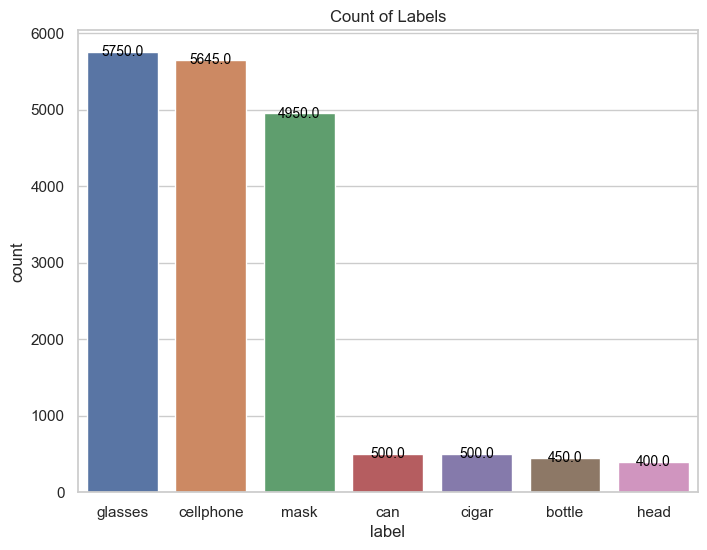

In [13]:
try:
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    ax = sns.barplot(x='label', y='count', data=df, hue='label')
    for p in ax.patches:
        label = p.get_height()  # 막대의 너비를 가져와서 count로 사용
        count = p.get_x() + p.get_width() / 2  # 막대의 y 좌표를 가져와서 label로 사용
        ax.annotate(f'{label}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.xlabel('label')
    plt.ylabel('count')
    plt.title('Count of Labels')
    save_path = f'label/{data_name}_label.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)

In [18]:
query2 = f'''select label, count(img_dir) as count from DeepInSight.{data_name}_landmark_info group by label;'''

In [19]:
db = doUT.db
conn = doUT.conn
conn.execute(query2)
column_names = [desc[0] for desc in conn.description]
result2 = conn.fetchall()
db.commit()

In [21]:
df2 = pd.DataFrame(result2, columns=column_names)
df2['count'] = df2['count'].astype('int64')

In [29]:
df2 = df2.sort_values(by='count',ascending=False)
df2

,label,count
3,upper_body_13,9849
0,face_68,9303
2,hand_right_21,7402
1,hand_left_21,6965


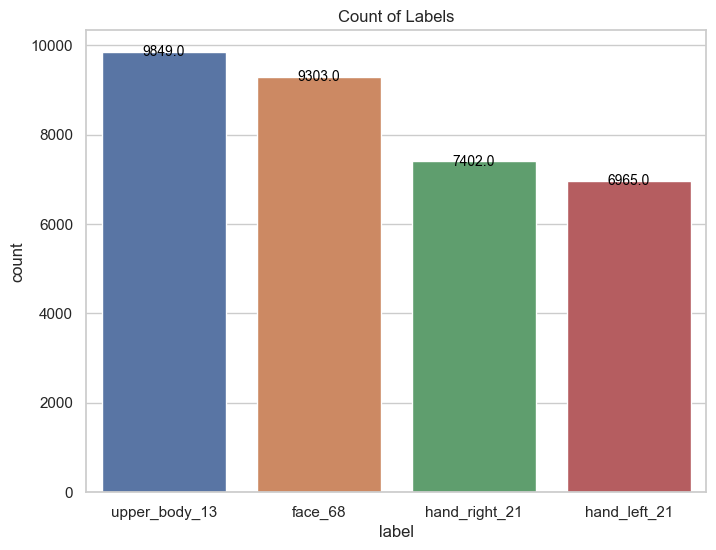

In [32]:
try:
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    ax = sns.barplot(x='label', y='count', data=df2, hue='label')
    for p in ax.patches:
        label = p.get_height()  # 막대의 너비를 가져와서 count로 사용
        count = p.get_x() + p.get_width() / 2  # 막대의 y 좌표를 가져와서 label로 사용
        ax.annotate(f'{label}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.xlabel('label')
    plt.ylabel('count')
    plt.title('Count of Labels')
    save_path = f'label/{data_name}_label2.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)